# Module 7 – Episode 26: Exploring Road Accident Data

In this episode, you'll explore a real-world road accident dataset from Lisbon.
We’ll analyze accident **severity**, **frequency**, **time of day**, and **spatial patterns** using Python tools like `pandas`, `matplotlib`, `seaborn`, and `geopandas`.

> ⚠️ **Important Notice**  
> This dataset contains real road accident records from Portugal in 2023, provided by **ANSR (Autoridade Nacional de Segurança Rodoviária)**.  
> It is intended **exclusively for educational use within this course**. Redistribution or use for any other purpose is strictly prohibited.

## Install Required Libraries

In [4]:
!pip install pandas geopandas matplotlib seaborn contextily --quiet

## Load and Preview the Dataset

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import contextily as ctx

# Load accident data
df = pd.read_csv("data/Road_Accidents_Lisbon.csv")
df.head()

,id,month,day,hour,weekday,fatalities_30d,serious_injuries_30d,minor_injuries_30d,latitude,longitude,municipality
0,9,Jan,1,2,Sunday,0,0,1,38.704531,-9.160449,Lisboa
1,14,Jan,1,4,Sunday,0,0,3,38.740480,-9.203064,Lisboa
2,31,Jan,1,13,Sunday,0,0,1,38.750393,-9.206963,Lisboa
3,40,Jan,1,17,Sunday,0,0,2,38.730103,-9.129061,Lisboa
4,41,Jan,1,18,Sunday,0,0,3,38.770751,-9.166213,Lisboa


### Road Accident Dataset

| Column Name            | Description                                              |
|------------------------|----------------------------------------------------------|
| `id`                   | Unique identifier for each accident event                |
| `month`                | Month of the accident (e.g., 1, 12)                   |
| `day`                  | Day of the month (1–31)                                  |
| `hour`                 | Hour of the day when the accident occurred (0–23)        |
| `weekday`              | Day of the week          |
| `fatalities_30d`       | Number of people who died within 30 days of the accident |
| `serious_injuries_30d` | Number of serious injuries reported within 30 days       |
| `minor_injuries_30d`   | Number of minor injuries reported within 30 days         |
| `latitude`             | Latitude coordinate of the accident location (WGS84)     |
| `longitude`            | Longitude coordinate of the accident location (WGS84)    |
| `municipality`         | Municipality where the accident occurred (e.g., Lisboa)  |


## Overview of Accident Severity and Frequency

In [13]:
print(f'Total accidents: {len(df)}')
df[['fatalities_30d', 'serious_injuries_30d', 'minor_injuries_30d']].sum()

Total accidents: 2182


fatalities_30d             9
serious_injuries_30d      51
minor_injuries_30d      2484
dtype: int64

## Temporal Patterns: Hourly Distribution

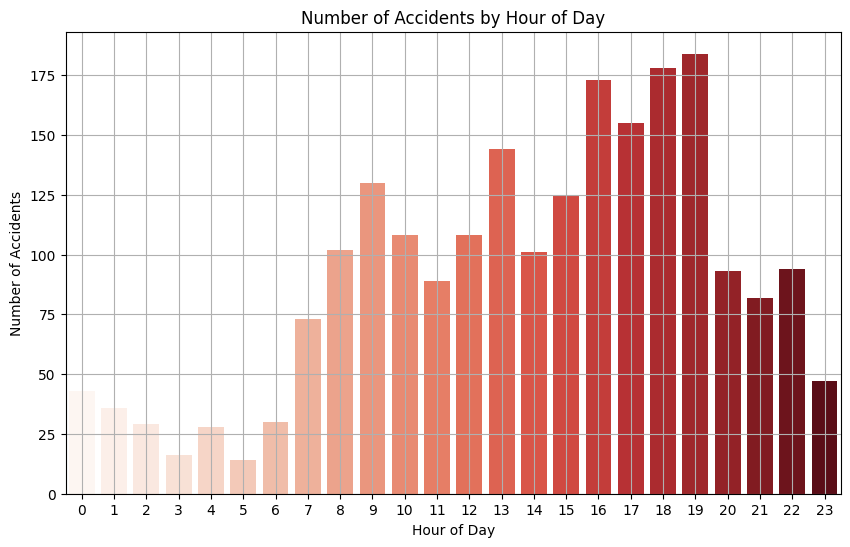

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour', hue='hour', palette='Reds', legend=False)
plt.title('Number of Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

## Temporal Patterns: Weekly Distribution

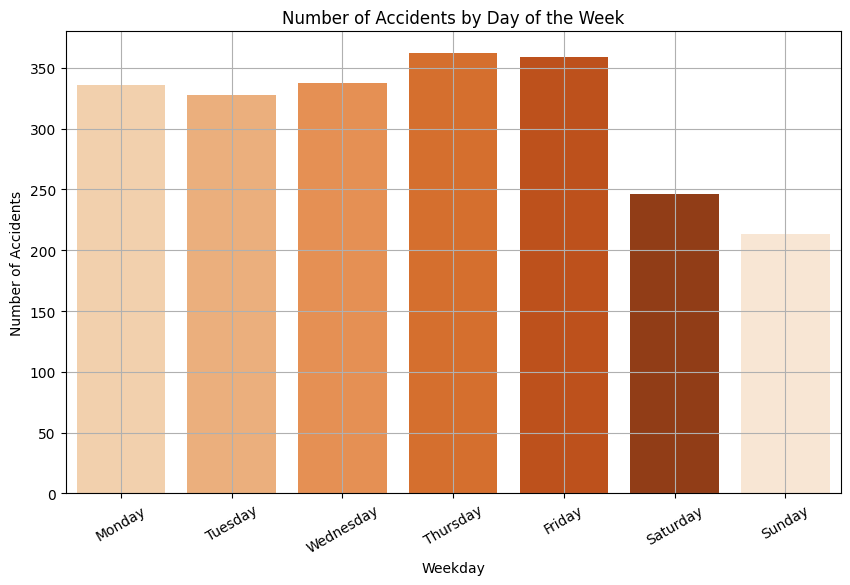

In [15]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weekday', order=weekday_order, hue='weekday', palette='Oranges', legend=False)
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

## Spatial Patterns: Map of Accident Locations

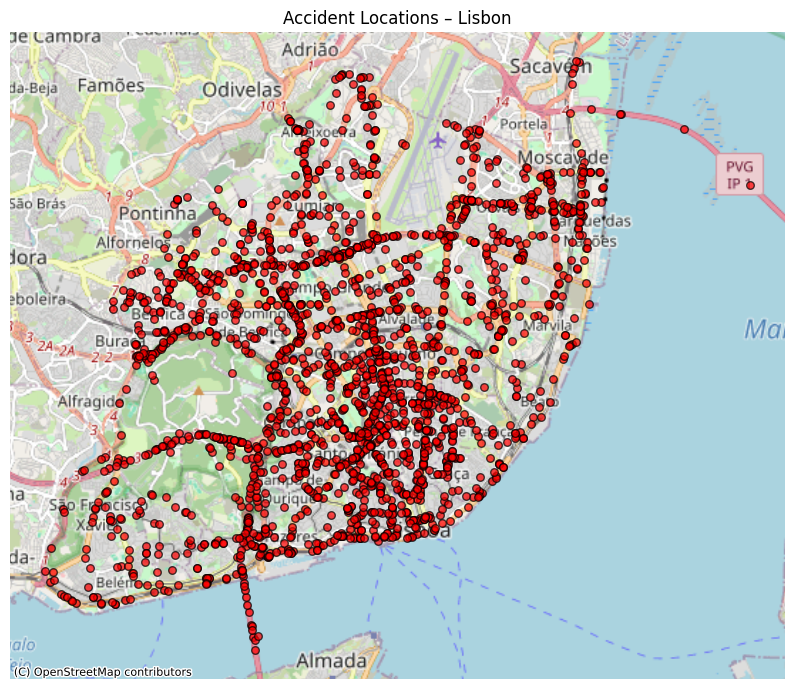

In [16]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=30, alpha=0.7, color='red', edgecolor='black')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title('Accident Locations – Lisbon')
ax.axis('off')
plt.show()

## Summary
In this episode, you explored a real-world road accident dataset from Lisbon using Python tools such as `pandas`, `seaborn`, `matplotlib`, and `GeoPandas`.

You analyzed accident **severity**, **frequency**, and **temporal patterns** by hour and weekday, revealing when accidents are most likely to occur.  
You also visualized accident locations on a city map, using geospatial coordinates and `Contextily` basemaps to detect spatial patterns across Lisbon.